In [ ]:
For subscription-based companies like Netflix and Spotify, it is crucial to retain existing
customers since the entire business model relies on plan renewals. If you would like to work
as a data scientist for companies like these in the future, it is a good idea to learn about
techniques such as customer churn prediction.

You can build a churn prediction model and showcase it on your resume, as this is a use case
that is relevant to almost every organization and will help your portfolio stand out amongst other data science candidates.
In this article, we will show you how to build a customer churn prediction model in Python using the random forests algorithm.
We will use the Telco Customer Churn dataset from Kaggle for this analysis. You also need a Python IDE to run the codes provided here,
and I suggest using a Jupyter Notebook since the software makes it easy to run code snippets and create visualizations.

Bagi perusahaan berbasis langganan seperti Netflix dan Spotify, mempertahankan keberadaan mereka sangatlah penting
pelanggan karena seluruh model bisnis bergantung pada pembaruan paket. Jika Anda ingin bekerja
sebagai ilmuwan data untuk perusahaan seperti ini di masa depan, ada baiknya untuk mempelajarinya
teknik seperti prediksi churn pelanggan.

Anda dapat membuat model prediksi churn dan menampilkannya di resume Anda, karena ini adalah kasus penggunaan
yang relevan bagi hampir semua organisasi dan akan membantu portofolio Anda menonjol di antara kandidat ilmu data lainnya.
Pada artikel ini, kami akan menunjukkan cara membuat model prediksi churn pelanggan dengan Python menggunakan algoritma random forest.
Kami akan menggunakan kumpulan data Telco Customer Churn dari Kaggle untuk analisis ini. Anda juga memerlukan IDE Python untuk menjalankan kode yang disediakan di sini,
dan saya menyarankan menggunakan Jupyter Notebook karena perangkat lunaknya memudahkan menjalankan cuplikan kode dan membuat visualisasi.

In [1]:
import pandas as pd

In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving Churn.csv to Churn.csv


In [4]:
df = pd.read_csv('Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# the dataframe has 21 columns related to telecom user subscription behavior.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
Each user is identified through a unique customer ID. There are 19 independent variables
used to predict the target feature – customer churn. In this dataset,
 customer churn is defined as users who have left within the last month.
Let’s count the number of customers in the dataset who have churned:

In [7]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
cols =['gender','SeniorCitizen','Partner','Dependents']
numerical = cols

In [10]:
plt.figure(figsize=(20,4))


<Figure size 2000x400 with 0 Axes>

<Figure size 2000x400 with 0 Axes>

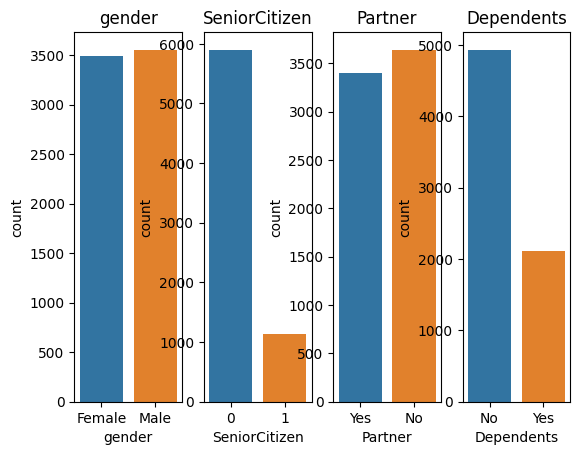

In [11]:
for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df)
    ax.set_title(f"{col}")

In [ ]:
Most customers in the dataset are younger individuals without a dependent.
 There is an equal distribution of user gender and marital status.
 Now, let’s look into the relationship between cost and customer churn. In the real world, users
 tend to unsubscribe to their mobile service provider and switch to a different brand
 if they find the monthly subscription cost too high. Let’s check if that behavior is reflected in our dataset:

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

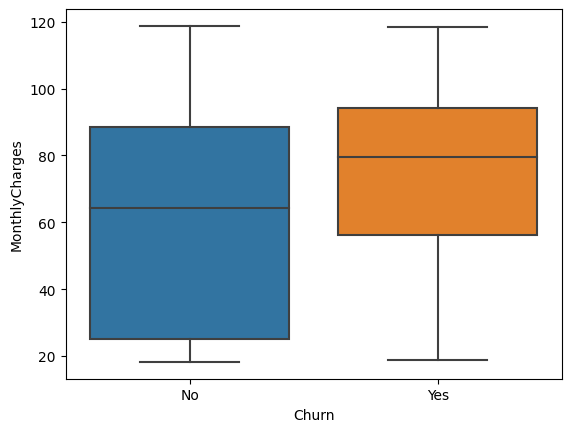

In [12]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

In [ ]:
The assumption above is true. Customers who churned have a higher median monthly charge than customers who renewed their subscription.

Finally, let’s analyze the relationship between customer churn and a few other categorical variables captured in the dataset:

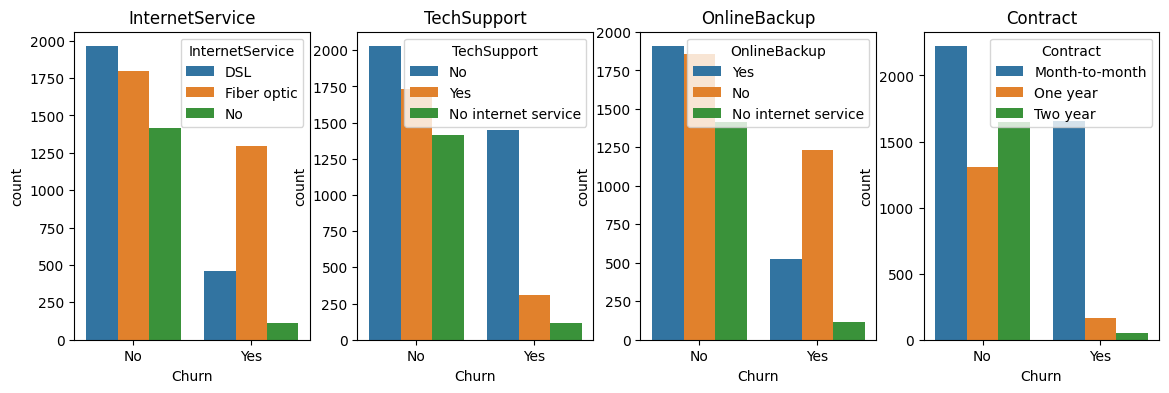

In [13]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

In [ ]:
Let’s look into each attribute:

InternetService: It is clear from the visual above that customers who use
fiber optic Internet churn more often than other users. This might be because
fiber Internet is a more expensive service, or this provider doesn’t have good coverage.

TechSupport: Many users who churned did not sign up for tech support.
 This might mean that these customers did not receive any guidance on
 fixing technical issues and decided to stop using the service.

OnlineBackup: Many customers who had churned did not sign up for an online backup service for data storage.

Contract: Users who churned were almost always on a monthly contract. This makes sense,
 since these customers pay for the service on a monthly basis and can easily cancel their s
 ubscription before the next payment cycle.

Even without building a fancy machine learning model, a simple data-driven
analysis like this can help organizations understand why they are losing customers and what they can do about it.
For instance, if the company realizes that most of their users who churn have not signed up for
 tech support, they can include this as a complimentary service in some of their future product offerings to prevent other customers from leaving.


In [14]:
# Notice that the variable “TotalCharges” has the data type “object,” when it should be a numeric column. Let’s convert this column into a numeric one:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

In [ ]:
The categorical variables in the dataset need to be converted into a numeric format before we can
feed them into the machine learning model. We will perform the encoding using Scikit-Learn’s label encoder.

First, let’s take a look at the categorical features in the dataset:

In [15]:
cat_features = df.drop(['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure'],axis=1)

cat_features.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [16]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_cat = cat_features.apply(le.fit_transform)
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [17]:
num_features = df[['customerID','TotalCharges','MonthlyCharges','SeniorCitizen','tenure']]
finaldf = pd.merge(num_features, df_cat, left_index=True, right_index=True)

In [ ]:
As mentioned above, the dataset is imbalanced, which means that a majority of values in the target variable belong
to a single class. Most customers in the dataset did not churn - only 27% of them did.
This class imbalance problem can lead to an underperforming machine learning model. Some algorithms
that train on an imbalanced dataset always end up predicting the majority class. In our case,
for instance, the model may predict that none of the customers churned. While a model like this will be highly
accurate (in this case it will be correct 73% of the time), it is of no value to us since it is always predicting a single outcome.
There are a variety of techniques that can be used to overcome the class imbalance problem in machine learning.
In this tutorial, we will use a technique called oversampling. This is a process that involves randomly selecting samples
from the minority class and adding it to the training dataset. We are going to oversample the minority class until the
number of data points are equal to that of the majority class.
Before we oversample, let’s do a train-test split. We will oversample solely
on the training dataset, as the test dataset must be representative of the true population:

In [20]:
# Now, let’s oversample the training dataset
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
X_train, y_train = X_smote, y_smote

In [21]:
y_train.value_counts()

0    3452
1    3452
Name: Churn, dtype: int64

In [ ]:
There should be 3,452 values in each class, which means that the training dataset is now balanced.

In [22]:
# We will now build a random forest classifier to predict customer churn:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=46)

In [23]:
# Let’s evaluate the model predictions on the test dataset:
from sklearn.metrics import accuracy_score

preds = rf.predict(X_test)
print(accuracy_score(prpeds,y_test))

0.7699267557087462
